In [141]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn.palettes
import numpy as np
import urllib2
import pandas as pd
%matplotlib inline

In [98]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

In [99]:
data = urllib2.urlopen(url).readlines()

In [164]:
data_ = np.array(pd.DataFrame([np.array(i.split(',')) for i in data[:150]]))

In [219]:
sep_len = tf.to_float(data_[:,0].astype(float))
sep_w = tf.to_float(data_[:,1].astype(float))
pet_len = tf.to_float(data_[:,2].astype(float))
pet_w = tf.to_float(data_[:,3].astype(float))
X = tf.transpose(tf.pack([sep_len, sep_w, pet_len, pet_w]))

In [224]:
y_ = [i.rstrip('\n') for i in data_[:,4]]
print set(y_)
mapping = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
y = tf.to_int32([mapping[i] for i in y_])

set(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor'])


### Model

In [266]:
W = tf.Variable(tf.zeros([4,3]), dtype=tf.float32, name='weights')
b = tf.Variable(tf.zeros([3]), dtype=tf.float32)

#yhat = tf.nn.softmax(tf.matmul(X, W) + b)
yhat = tf.matmul(X, W) + b
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(yhat, y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss)

In [267]:
sess = tf.Session()
sess.run(tf.initialize_all_variables())

In [268]:
loss_out = []
for i in range(10000):
    sess.run(optimizer)
    loss_out.append(sess.run(loss))

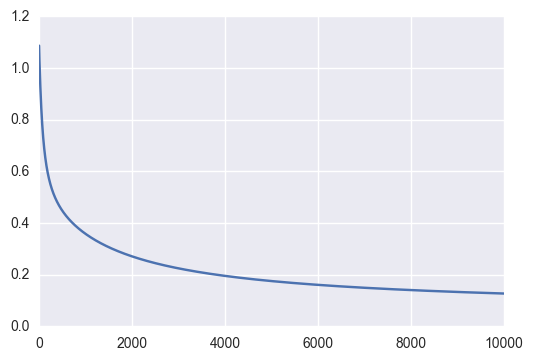

In [269]:
plt.plot(loss_out)

In [270]:
predicted = sess.run(tf.nn.softmax(tf.matmul(X, W) + b))

In [285]:
pred_error = [i == max(i) for i in predicted]

In [307]:
classes = [0,1,2]
pred_calss = [classes[i.tolist().index(True)] for i in pred_error]

In [322]:
# pred erorr
sum([i[0] == i[1] for i in zip(pred_calss, sess.run(y).tolist())]) / float(len(pred_calss))

0.9866666666666667